<a href="https://colab.research.google.com/github/Anu00parajuli/MachineLearningBootcamp/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np


In [2]:
(x_train , y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


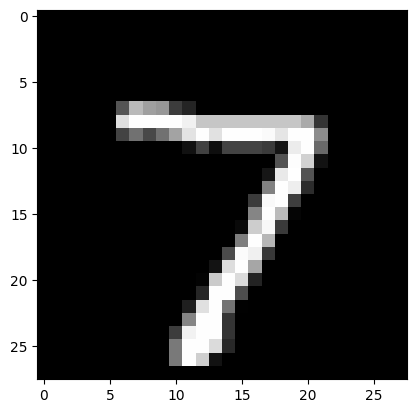

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap="gray")

In [7]:
x_train[0].shape

(60000, 28, 28)

In [6]:
x_train.shape

60000

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
logreg = LogisticRegression(max_iter = 100)
logreg.fit(x_train , y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy: ", accuracy_logreg)

Logistic Regression Accuracy:  0.9255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.svm import SVC

In [15]:
svc = SVC(max_iter = 100)
svc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=100)

In [16]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
y_pred_svc = svc.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy: ", accuracy_svc)

#Calculate confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

SVC Accuracy:  0.9271


In [23]:
#Neural Network
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
#input layer
model.add(Dense(128, activation = 'relu', input_shape = (28*28,) ))
model.add(Dense(64,  activation = "relu" ))
model.add(Dense(10,  activation = "softmax" ))

#outputLayer
model.add(Dense(10, "sigmoid"))

In [19]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    x_train,
    y_train,
    epochs = 2,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/2
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1240 - accuracy: 0.1815 - val_loss: 1.9954 - val_accuracy: 0.1972
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0046 - accuracy: 0.2008 - val_loss: 2.2498 - val_accuracy: 0.1403


In [26]:
np.argmax([0.1, 0.4 , 0.3 , 0.1 , 0.1])

1

In [35]:

test_loss , test_acc = model.evaluate(x_test, y_test)
y_pred_nn = model.predict(x_test)

f1_score_nn = f1_score(y_test, np.argmax(y_pred_nn, axis = 1), average = 'weighted')

precision = precision_score(y_test, np.argmax(y_pred_nn, axis = 1), average = 'weighted')
recall = recall_score(y_test, np.argmax(y_pred_nn , axis = 1), average = 'weighted')

#Print the results
print("NN Loss: ", test_loss)
print("NN Accuracy: ", test_acc)
print("NN F1 Score: ", f1_score_nn)
print("NN Precision: ", precision)

313/313 [==============================] - 1s 2ms/step
NN Loss:  2.2498435974121094
NN Accuracy:  0.14030000567436218
NN F1 Score:  0.055079274307435165
NN Precision:  0.048445013156464066


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
